<a href="https://colab.research.google.com/github/mixmaxze/classificacao_pedestres_com_ia/blob/main/Classifica%C3%A7%C3%A3o_de_pedestres_com_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Atividade de Programação 02**
## **Um Agente Inteligente para Classificação de Pedestres**

IA  2021.1e

Prof. Herman Gomes

---

A detecção da presença de pedestres em cenas de trânsito com vistas a [evitar atropelamentos](https://www.youtube.com/watch?v=vI9EIjUx20I) é uma tarefa crítica para o desenvolvimento de veículos autônomos e  sistemas avançados de assistência ao motorista - preservar a vida humana deve ser uma diretiva ética fundamental na concepção de tais sistemas. 

Inserido neste contexto, o propósito da Atividade de Programação 02 é desenvolver um agente inteligente para uma instância mais simples da tarefa, em que regiões candidatas da imagem já foram segmentadas e o objetivo do agente inteligente é decidir se uma determinada região contém ou não contém um pedestre. Em outras palavras, o seu agente irá receber um recorte de imagem em tons de cinza do ambiente e retornar uma classificação binária (contém ou não contém um pedestre). O agente deverá aprender de forma supervisionada na modalidade offline (o treinamento ocorre por completo antes do agente entrar em operação). 

Para o desenvolvimento desta atividade, deve-se utilizar a base de dados “[Daimler Pedestrian Classification Benchmark Dataset](http://www.gavrila.net/Datasets/Daimler_Pedestrian_Benchmark_D/Daimler_Mono_Ped__Class__Bench/daimler_mono_ped__class__bench.html)”. Mais especificamente, o “[Base pedestrian classification data set](http://www.lookingatpeople.com/data/Daimler/pami06-munder-gavrila/DC-ped-dataset_base.tar.gz)”. 

Além disso, considerar uma técnica de aprendizagem de máquina como base para funcionamento do seu agente. Algumas possibilidades:

* Uma rede Neural Convolucional operando diretamente sobre as imagens.
* Uma rede neural MultiLayer Perceptron operando sobre versões reduzidas (redimensionadas) das imagens de entrada
* Uma árvore de decisão (ou RandomForest) operando sobre vetores de características extraídos das imagens  (.e.g. histogramas de cores, bordas, texturas). As características podem também ser obtidas a partir de um autocodificador neural. 
* Um classificador Bayesiano (NaïveBayes) operando sobre características extraídas das imagens
* Rede Bayesiana operando sobre características extraídas das imagens

As equipes podem testar os exemplos de códigos python vistos em aula e buscar adaptá-los para esta tarefa, escolhendo (para constar na resposta da equipe) a solução que produzir os melhores resultados. 

Alternativamente, para acelerar o tempo de treinamento, as equipes podem também adaptar um modelo de rede neural pré-treinado (como VGG16), como discutido neste [post](https://machinelearningmastery.com/how-to-use-transfer-learning-when-developing-convolutional-neural-network-models/),  e refinar o treinamento para o caso de classificação de pedestres.

***Roteiro da atividade:***
1.   Criem uma cópia do notebook da atividade, para edição pelos componentes da equipe. Ao concluir a atividade, façam download do notebook (.ipynb) acrescentem a extensão .txt e faça o upload do arquivo do notebook (.ipynb.txt) como resposta da tarefa.
2.   Completem as partes faltantes da implementação do Agente PedestrianClassifier
3. Realizem o treinamento do agente, conforme a seção correspondente no notebook da atividade. 
4. Implementem os códigos faltantes para uso e avaliação do desempenho do agente, façam o experimento final, sempre respondendo às questões formuladas no notebook. 

Boa sorte e bom trabalho!

---


## Preparação dos dados

Obtendo o "Daimler base pedestrian classification dataset".

In [ ]:
!wget http://www.lookingatpeople.com/data/Daimler/pami06-munder-gavrila/DC-ped-dataset_base.tar.gz

--2022-03-30 19:37:26--  http://www.lookingatpeople.com/data/Daimler/pami06-munder-gavrila/DC-ped-dataset_base.tar.gz
Resolving www.lookingatpeople.com (www.lookingatpeople.com)... 134.119.45.88, 2a00:1158:1000:300::558
Connecting to www.lookingatpeople.com (www.lookingatpeople.com)|134.119.45.88|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30640226 (29M) [application/x-tar]
Saving to: ‘DC-ped-dataset_base.tar.gz’

DC-ped-dataset_base 100%[===================>]  29.22M  16.5MB/s    in 1.8s    

2022-03-30 19:37:28 (16.5 MB/s) - ‘DC-ped-dataset_base.tar.gz’ saved [30640226/30640226]



Criando pasta para receber os dados descompactados.

In [ ]:
!rm -rf data
!mkdir data

Descompactando os dados.

In [ ]:
!tar -zxf DC-ped-dataset_base.tar.gz -C data

Notar que, conforme a [descrição da base de dados](http://www.lookingatpeople.com/data/Daimler/pami06-munder-gavrila/README_benchmark.txt), após o comando acima, serão descompactadas 5 pastas dentro da pasta 'data'. A subpastas '1', '2' e '3' são subconjuntos de treinamento contendo exemplos de pedestres/não-pedestres. Já as subpastas 'T1' e 'T2' são subconjuntos de teste, também contendo exemplos de pedestres/não-pedestres. Neste exercício, utilizaremos inicialmente a subpasta '1' para treinamento e a subpasta 'T1' para teste. Depois, será solicitado repetir o experimento, treinando com a subpasta '2' e testando com a mespa subpasta 'T1'.

# Implementação do Agente
***Complete as partes faltantes do código a seguir*** (3 pontos)

In [ ]:
# Colocar aqui os imports necessários

import cv2
import keras
import numpy as np
import os
import random
import seaborn as sns
import tensorflow as tf

from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

%matplotlib inline

In [ ]:
from keras.layers.pooling import AveragePooling2D
class PedestrianClassifier:
  
  # Incluir aqui os atributos da classe que acharem relevantes

  # Método para inicialização do agente
  def __init__(self):
    # Incluir aqui o código para criação e inicializaçao da rede neural (utilizar keras para implementação)
    # Caso julguem necessário, podem incluir parâmetros adicionais neste método

    # Criando a Rede Neural Convolucional
    classifier = Sequential()

    # Adicionando as camadas necessárias
    classifier.add(Conv2D(25, (3, 3), input_shape = (36, 18, 3), activation = 'relu'))
    classifier.add(MaxPooling2D(pool_size = (2, 2)))
    #classifier.add(Conv2D(32, (2, 2), activation = 'relu'))
    #classifier.add(MaxPooling2D(pool_size = (2, 2)))
    classifier.add(Flatten())
    classifier.add(Dense(units = 128, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))

    # Compilando a rede
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

    self.classifier = classifier

  # Método para treinamento do agente 
  def train_offline(self, inputs, outputs):
    # Incluir aqui o código para treinamento da rede neural (ou da máquina de aprendizagem escolhida) 
    # a partir das entradas e saídas desejadas
    # Utilizar 80% dos dados recebidos pela função para treinamento e os 20% restantes para validação
    # Definir um número grande de épocas e configurar para que o treinamento termine pela acurácia de validação (patience=10)
    # A função train_offline deve retornar o histórico do treinamento como aquele retornado pelo método model.fit(...) do keras
    # Caso julguem necessário, podem incluir parâmetros adicionais neste método

    history = self.classifier.fit(inputs, outputs, verbose = 1,
                    validation_split = 0.2, 
                    epochs = 100,
                    batch_size = 150)

    return history.history

  # Método para teste do agente em um conjunto de entradas desconhecidas
  def predict(self, inputs):
    # Incluir aqui o seu código para retornar as saídas do agente para um conjunto de imagens de teste (inputs)

    cutoff = 0.5
    predictions = [1 if x[0] >= cutoff else 0 for x in self.classifier.predict(inputs)]

    # Predictions = self.classifier.predict(inputs)

    return predictions

# Treinamento do Agente em modo offline
A seguinte função auxiliar faz a preparação e o carregamento dos dados para a memória. <br>
***Complete as partes faltantes do código a seguir.*** (2 pontos)

In [ ]:
def load_data(training_images_path, test_images_path):
  # Inclua aqui código para carregar os vetores para treinamento e teste da rede neural
  # A função deve retornar vetores de entradas e saídas desejadas no formato esperado 
  # Por uma rede neural convolucional na biblioteca keras
  # Vejam um exemplo de chamada a esta função na célula de código seguinte

    train_inputs = []
    train_outputs = []
    test_inputs = []
    test_outputs = []

    for directory in os.listdir(training_images_path):
        for file in os.listdir(training_images_path + directory):
            image = cv2.imread(training_images_path + directory + '/' + file)
            train_inputs.append(image)

            label = 0 if 'non-ped' in directory else 1
            train_outputs.append(label)

    for directory in os.listdir(test_images_path):
        for file in os.listdir(test_images_path + directory):
            image = cv2.imread(test_images_path + directory + '/' + file)
            test_inputs.append(image)

            label = 0 if 'non-ped' in directory else 1
            test_outputs.append(label)

    return  np.array(train_inputs), np.array(train_outputs, dtype=np.int64), np.array(test_inputs), np.array(test_outputs, dtype=np.int64)

A seguinte célula carrega os dados, cria um agente inteligente e faz o seu treinamento de forma offline.


In [ ]:
# Carregando dados de treinamento da pasta 'data/1' e de teste da pasta 'data/T1'
(train_inputs, train_outputs, test_inputs, test_outputs) = load_data(training_images_path = '/content/data/1/', test_images_path= '/content/data/T1/')

# Criando o agente
agent = PedestrianClassifier()

# Treinando o agente de forma offline
history  = agent.train_offline(train_inputs,train_outputs)

Epoch 1/100
53/53 [==============================] - 11s 14ms/step - loss: 29.8163 - accuracy: 0.6397 - val_loss: 0.7456 - val_accuracy: 0.7622
Epoch 2/100
53/53 [==============================] - 0s 9ms/step - loss: 0.4910 - accuracy: 0.8411 - val_loss: 0.4421 - val_accuracy: 0.8332
Epoch 3/100
53/53 [==============================] - 0s 9ms/step - loss: 0.2572 - accuracy: 0.9062 - val_loss: 0.5640 - val_accuracy: 0.7918
Epoch 4/100
53/53 [==============================] - 0s 9ms/step - loss: 0.1913 - accuracy: 0.9267 - val_loss: 0.2385 - val_accuracy: 0.9082
Epoch 5/100
53/53 [==============================] - 0s 9ms/step - loss: 0.1192 - accuracy: 0.9594 - val_loss: 0.2913 - val_accuracy: 0.8898
Epoch 6/100
53/53 [==============================] - 0s 9ms/step - loss: 0.0929 - accuracy: 0.9663 - val_loss: 0.4476 - val_accuracy: 0.8398
Epoch 7/100
53/53 [==============================] - 0s 9ms/step - loss: 0.0770 - accuracy: 0.9728 - val_loss: 0.2338 - val_accuracy: 0.9168
Epoch 8/10

O seguinte código faz a visualização do processo de treinamento na forma de um gráfico. No eixo x estão as épocas de treinamento e no eixo y devem ser plotadas as seguintes métricas: perda (loss) de treinamento e de validação, acurácia de treinamento e de validação. <br>***Complete o código da função plot_training_curves().*** (1 ponto)

In [ ]:
def plot_training_curves(h):
  
    ax = plt.subplots()[1]

    ax.plot(history['accuracy'], label='acc')
    ax.plot(history['val_accuracy'], label = 'val_acc')
    ax.plot(history['loss'], label = 'loss')
    ax.plot(history['val_loss'], label = 'val_loss')

    ax.set_xlabel('epoch')
    ax.set_ylim([-0.05,1.05])
    ax.legend()

    return ax

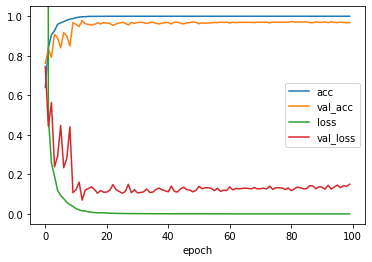

In [ ]:
# Visualizando as curvas
# Notar que history é a variável que guarda o resultado do treinamento do agente

plot_training_curves(history)

Caso as curvas indiquem algum tipo de problema (e.g. under ou overfitting), revisar as etapas anteriores, como o carregamento dos dados, os parâmetros de treinamento e a arquitetura da rede. Apenas prosseguir para as próximas etapas quando estiverem satisfeitos com a etapa de treinamento, refletida na "saúde" das curvas acima.

# Uso do Agente
Vamos agora fazer predições e calcular as taxas de TP (true positive), FP (false positive), TN (true negative), FN (false negative) do agente inteligente. Um verdadeiro positivo ocorre quando o agente classifica como pedestre um recorte de imagem que contém um pedestre. Um falso positivo ocorre quando o agente classifica como pedestre um recorte de imagem que não contém um pedestre. Um verdadeiro negativo ocorre quando um recorte contendo um não-pedestre é classificado como tal. Um falso negativo ocorre quando um recorte contendo um pedestre é classificado como não-pedestre. 

A seguinte função deve calcular e apresentar a matriz de confusão binária contendo TP, FP, TN, FN, conforme este artigo da [wikipedia](https://en.wikipedia.org/wiki/Confusion_matrix). ***Completar o código para show_confusion_matrix().*** (1 ponto)

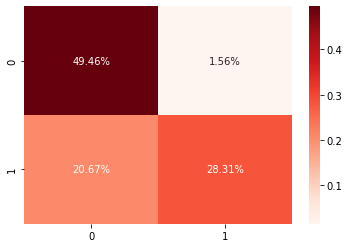

In [ ]:
# Fazendo predições sobre imagens de teste
# Notar que test_outputs foram obtidos de uma célula mais acima

test_predictions = agent.predict(test_inputs)

def show_confusion_matrix(test_predictions,test_outputs):

    cf_matrix = confusion_matrix(y_pred = test_predictions, y_true = test_outputs)
    ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = True, cmap='Reds', fmt='.2%')

    return ax

show_confusion_matrix(test_predictions, test_outputs)

**Escreva na célula a seguir, uma função que permita visualizar uma amostra de 10% das imagens associadas aos  tipos de erro FP e FN.** (1 ponto)

SHOWING FALSE POSITIVE EXAMPLES


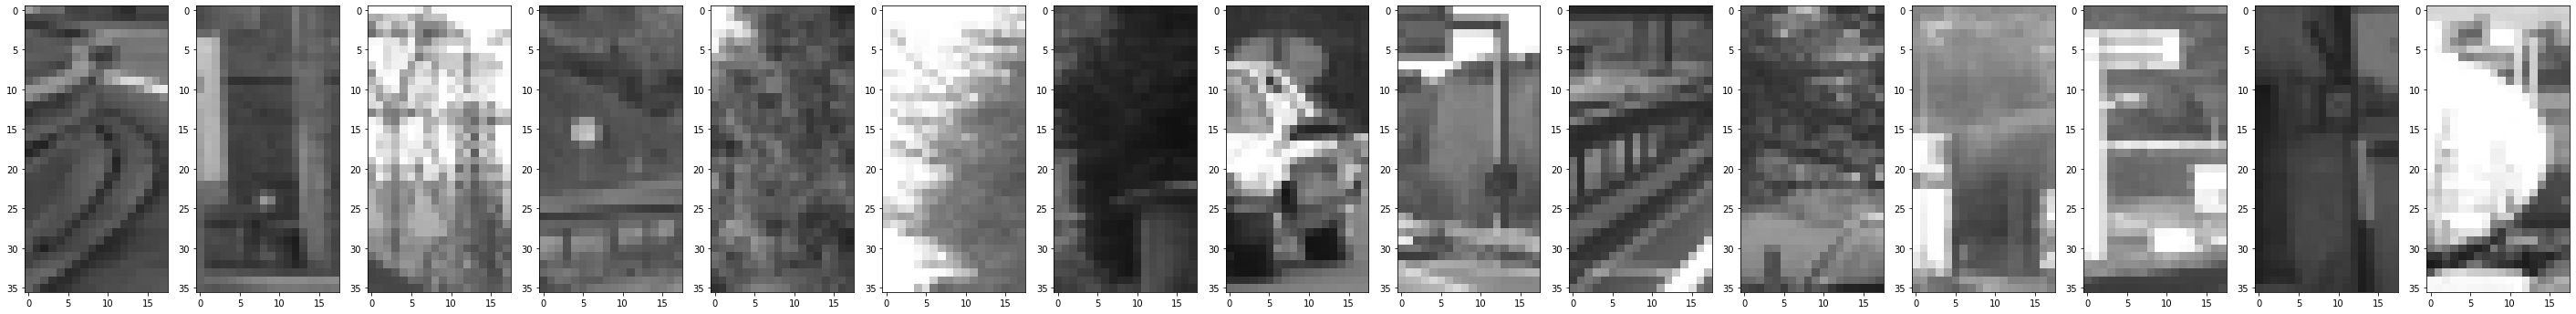

SHOWING FALSE NEGATIVE EXAMPLES


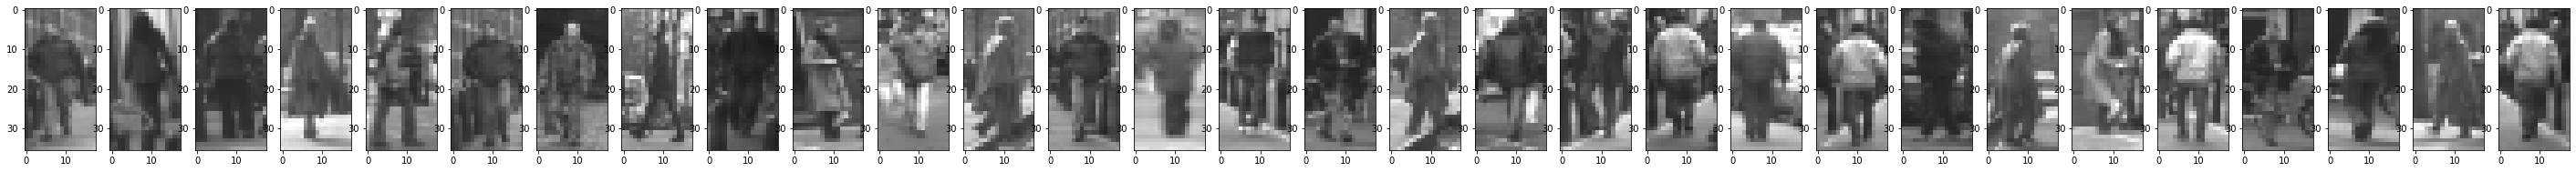

In [ ]:
def show_errors(test_inputs, test_predictions, test_outputs, percent_FP, percent_FN):
    
    false_positives_indexes = []
    false_negatives_indexes = []

    for index in range(len(test_predictions)):
        if test_predictions[index] == 1 and test_outputs[index] == 0:
            false_positives_indexes.append(index)
        if test_predictions[index] == 0 and test_outputs[index] == 1:
            false_negatives_indexes.append(index)

    size_fp = int(len(false_positives_indexes) * percent_FP)
    size_fn = int(len(false_negatives_indexes) * percent_FN)

    false_positives_random_indexes = random.sample(false_positives_indexes, size_fp)
    false_negatives_random_indexes = random.sample(false_negatives_indexes, size_fn)

    print('SHOWING FALSE POSITIVE EXAMPLES')
    show_fp_images(test_inputs, false_positives_random_indexes)

    print('SHOWING FALSE NEGATIVE EXAMPLES')
    show_fn_images(test_inputs, false_negatives_random_indexes)

def show_fp_images(images, indexes):

    n = len(indexes)
    f = plt.figure(figsize=(50,50))
    for i in range(n):
        f.add_subplot(1, n, i + 1)
        plt.imshow(images[i])

    plt.show(block=True)

def show_fn_images(images, indexes):

    # DECIDI MOSTRAR APENAS 30 EXEMPLOS DOS FALSOS NEGATIVOS, POIS ERAM MUITOS

    images = images[::-1]
    n = 30

    f2 = plt.figure(figsize=(50,50))
    for i in range(n):
        f2.add_subplot(1, n, i + 1)
        plt.imshow(images[i])

    plt.show(block=True)

# Exemplo de chamada (se clicar nas imagens, elas aumentam)
show_errors(test_inputs, test_predictions, test_outputs, 0.1, 0.1)

A partir desses resultados, incluir na seguinte célula de texto:<br>

1) Uma discussão sobre como ficaram os acertos e erros do sistema ao final do treinamento. (0.5 ponto) <br>

2) Comentar sobre a ética da operação do agente. Comentar sobre qual tipo de  erro pode contribuir negativamente para a integridade física dos pedestres, FP ou FN? (1 ponto)<br> 

3) Com base na análise dos erros do agente no conjunto de testes, é possível concluir que um ser humano cometeria os mesmos erros ou não? (0.5 ponto)

***`colocar as respostas aqui`***

1 - As curvas de acurácia ficaram ótimas. Já a curva de perda da validação ficou um pouco instável e um pouco mais alta que a curva de perda do treinamento. O maior problema é apontado pela matriz de confusão: há muitos falsos negativos na predição. Ou seja, o algoritmo está afirmando que muitos pedestres não são pedestres. Eu rodei a rede várias vezes, com vários hiperparâmetros diferentes, mas sempre a matriz de confusão aponta esse defeito. Apesar disso, no geral o algoritmo teve um bom desempenho. As épocas não demoram tanto a rodar e a precisão final é aceitável. <br>
2 - Com certeza um falso positivo é mais perigoso que um falso negativo. Se o algoritmo diz que um objeto é uma pessoa, o máximo que pode acontecer (dependendo do contexto do uso) é o objeto ser "quebrado", podendo simplesmente ser substituído ou reconstruído depois. Mas se o algoritmo diz que um pedestre não é um pedestre, o risco máximo é que ele perca a vida, o que é uma tragédia irreparável e muito pior do que simplesmente destruir um objeto ou coisa qualquer. <br>
3 - Em alguns casos, sim. Por exemplo, às vezes de muito longe é possível confundir um poste com uma pessoa alta, uma sacola de lixo preta com uma criança de casaco (eu que sou míope me confundo de vez em quando). Enfim, há sim objetos que podem ser confundidos com pedestres, principalmente quando há vários objetos pertos uns dos outros. Por outra parte, acho bem difícil que o contrário aconteça, isto é, confundir pessoas com objetos. Acho que é mais intuitivo reconhecer um ser humano que de fato é um, afinal somos seres humanos e nos reconhemos muito bem.